# Data Visualization on Exchange Rates

This project is part of the guided projects available on [Dataquest.io](https://dataquest.io). The project goal is analyze and visualize exchange rates of USD and EUR. The daily exchange rates were collected in between years 1999 adn 2021. The original dataset was published by [Daria Chemkaeva](https://www.kaggle.com/lsind18) on Kaggle under the name [Daily Exchange Rates per Euro 1999-2021](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020).

## 1. First Look

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline


In [3]:
# opening the dataset & displaying basic info
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5776,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5777,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5778,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5779,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5780,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
Period\Unit:                5781 non-null object
[Australian dollar ]        5781 non-null object
[Bulgarian lev ]            5379 non-null object
[Brazilian real ]           5513 non-null object
[Canadian dollar ]          5781 non-null object
[Swiss franc ]              5781 non-null object
[Chinese yuan renminbi ]    5513 non-null object
[Cypriot pound ]            2346 non-null object
[Czech koruna ]             5781 non-null object
[Danish krone ]             5781 non-null object
[Estonian kroon ]           3130 non-null object
[UK pound sterling ]        5781 non-null object
[Greek drachma ]            520 non-null object
[Hong Kong dollar ]         5781 non-null object
[Croatian kuna ]            5513 non-null object
[Hungarian forint ]         5781 non-null object
[Indonesian rupiah ]        5781 non-null object
[Israeli shekel ]           5513 non-null object
[Indian rupe

The dataset contains of 5699 rows, mixed with strings and float values. There are some NaN entires.

## 2. Data Cleaning
### 2.1 Cleaning the header row

In [6]:
# Function for cleaning header row
def clean_col(col):
    col = col.replace("[", "")
    col = col.replace(" ]", "")
    col = col.strip()
    col = col.replace(" ", "_")
    col = col.lower()
    return col

# Cleaning the header row
new_header = []

for c in exchange_rates.columns:
    clean_header = clean_col(c)
    new_header.append(clean_header)

exchange_rates.columns = new_header

# Renaming the Period\\Unit to Time
exchange_rates.rename(columns={"period\\unit:":"time"}, 
                      inplace= True)

# Converting time to datetime from object
exchange_rates["time"] = pd.to_datetime(exchange_rates["time"])

# Sorting the time values in ascending order
exchange_rates.sort_values("time", inplace=True)

# Reseting index order and dropping the initial index
exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates.head()


,time,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


### 2.2 Cleaning the data values
Aim of this project is to analyze EUR and USD rates. I will proceed with cleaning the particular currency column and the time column.

#### `us_dollar` cleaning 

In [7]:
# Creating new dataframe with time and USD
euro_to_dollar = exchange_rates[["time", "us_dollar"]]

# Inspecting USD
print(euro_to_dollar["us_dollar"].value_counts(dropna=False))
print(euro_to_dollar["us_dollar"].value_counts().sum())

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
0.8578     1
1.0884     1
1.2128     1
1.0838     1
1.3936     1
Name: us_dollar, Length: 3549, dtype: int64
5781


There are 62 occurences wiht "-" symbol. Since it makes only 1% of the whole set, I will drop tohose rows.

In [8]:
# Excluding the rows with "-" symbol
euro_to_dollar = euro_to_dollar[euro_to_dollar["us_dollar"] != "-"]

# Converting to float
euro_to_dollar["us_dollar"] = euro_to_dollar["us_dollar"].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
time         5719 non-null datetime64[ns]
us_dollar    5719 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


The data a cleaned and prepared for visualization. The data frame have two columns with `time` and `us_dollar` columns, no NaN values and total of 5637 rows.

## 3. Exploratory visualizations
### 3.1 Rolling Mean

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


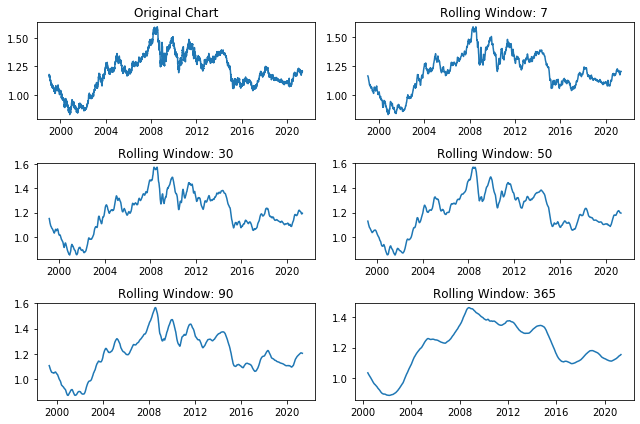

In [9]:
plt.figure(figsize=(9,6))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar["time"],euro_to_dollar["us_dollar"])
plt.title("Original Chart")

for i, rolling_mean in zip([2,3,4,5,6],
                          [7,30,50,90,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar["time"],
             euro_to_dollar["us_dollar"].rolling(rolling_mean).mean())
    plt.title("Rolling Window:" + " " + str(rolling_mean))
    
plt.tight_layout()    
plt.show()

In [10]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["us_dollar"].rolling(30).mean()
euro_to_dollar

,time,us_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5776,2021-04-30,1.2082,1.192843
5777,2021-05-03,1.2044,1.193283
5778,2021-05-04,1.2021,1.193717
5779,2021-05-05,1.2005,1.193980


## 4. Explanatory visualizations: exchange rates under the last US presidents
**The goal** of the following visualization is to show how the EUR and USD exchange reates changed over the time period 2001-2021 under administration of Bush, Obama and Trump.
#### Preparing the underlying data

In [11]:
# DataFrame containing entries from 2001 to 2021
presidents = (euro_to_dollar.copy()
              [(euro_to_dollar["time"].dt.year >= 2001) &
              (euro_to_dollar["time"].dt.year < 2021)]
             )

# DataFrame for Bush administration
bush = presidents.copy()[presidents["time"].dt.year < 2009]

# DataFrame for Obama administration
obama = (presidents.copy()
         [(presidents["time"].dt.year >= 2009) &
         (presidents["time"].dt.year < 2017)]
        )

# DataFrame for Trump administration
trump = presidents.copy()[presidents["time"].dt.year >= 2017]     

#### Creating the visualization

In [12]:
# Using the Five Thirty Eight style for the charts
style.use('fivethirtyeight')

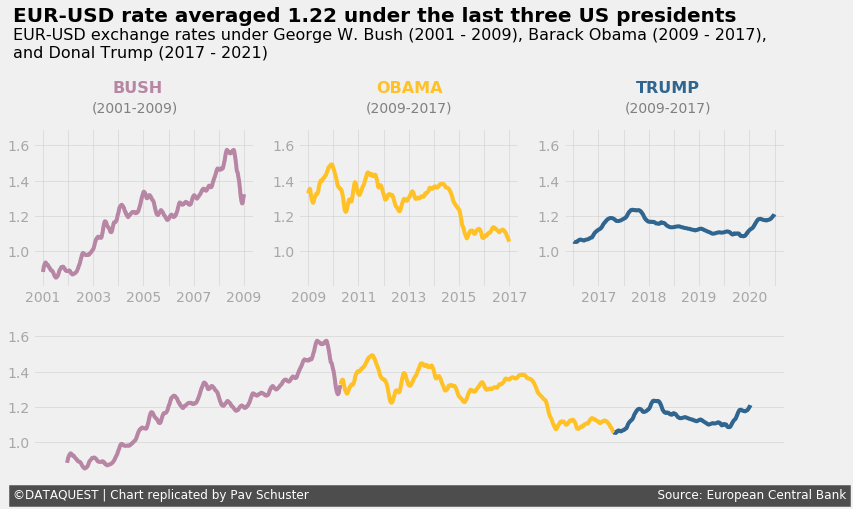

In [13]:
# Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

# Style for all subplots
for ax in axes:    
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)  

# Plotting Bush chart
ax1.plot(bush["time"],bush["rolling_mean"], color="#B786A4")
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731500, 1.9, "BUSH", color="#B786A4", weight="bold",
        size=16)
ax1.text(731200, 1.79, "(2001-2009)", color="gray", size=14)

# Plotting Obama chart
ax2.plot(obama["time"],obama["rolling_mean"], color="#FFC125")
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734400, 1.9, "OBAMA", color="#FFC125", weight="bold",
         size=16)
ax2.text(734250, 1.79, "(2009-2017)", color="gray", size=14)

# Plotting Trump chart
ax3.plot(trump["time"],trump["rolling_mean"], color="#2F658E")
ax3.set_xticklabels(['', '2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736780, 1.9, "TRUMP", color="#2F658E", weight="bold",
         size=16)
ax3.text(736700, 1.79, "(2009-2017)", color="gray", size=14)

# Plotting summary chart for all presidents
ax4.plot(bush["time"],bush["rolling_mean"], color="#B786A4")
ax4.plot(obama["time"],obama["rolling_mean"], color="#FFC125")
ax4.plot(trump["time"],trump["rolling_mean"], color="#2F658E")
ax4.set_xticks([])

# Adding title and subtitle
ax1.text(730050, 2.3, "EUR-USD rate averaged 1.22 under the last three US presidents",
         color="black", weight="bold",
        size=20)
ax1.text(730050, 2.1, '''EUR-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009 - 2017),
and Donal Trump (2017 - 2021)''',
         color="black", size=16)

# Adding source bar
ax1.text(730050, -0.4, "©DATAQUEST | Chart replicated by Pav Schuster" + " "*90 + "Source: European Central Bank",
         color="white", size=12, backgroundcolor = '#4d4d4d')
plt.show()

## 5. Analyzing EUR - CZK rates during covid-19 pandemic
Following chart is my own analysis of the Euro and Czech Koruna exchange rates during the covid-19 pandemic. First cases of the virus in Europe were reported in January. First case in Czech Republic was reported in March. I will analyze the rates from December 2019 on. The Covid-19 health data are available on the Czech Ministry of Health [dashboard](https://onemocneni-aktualne.mzcr.cz/covid-19?utm_source=general&utm_medium=widget&utm_campaign=covid-19). The first wave in chart is the period starting in September when the daily cases breached the magical number of 10k cases per day. 
### 5.1 Preparing the underlying data
The analyzed columns are time and `czech_koruna`

In [14]:
# Creating new dataframe with time and USD
eur_to_czk = exchange_rates[["time", "czech_koruna"]]

# Inspecting USD
print(eur_to_czk["czech_koruna"].value_counts(dropna=False))
print(eur_to_czk["czech_koruna"].value_counts().sum())

27.021    120
-          62
27.022     37
27.023     25
27.025     17
         ... 
25.525      1
26.207      1
27.211      1
24.783      1
28.035      1
Name: czech_koruna, Length: 3730, dtype: int64
5781


Similarly to USD there are 62 occurences of the "-" symbol, that would mess up with the further analysis.

In [15]:
# Excluding the rows with "-" symbol
eur_to_czk = eur_to_czk[eur_to_czk["czech_koruna"] != "-"]

# Converting to float
eur_to_czk["czech_koruna"] = eur_to_czk["czech_koruna"].astype(float)
eur_to_czk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
time            5719 non-null datetime64[ns]
czech_koruna    5719 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


### 5.3 Visualizing the covid-19 exchange rates

In [16]:
# Calculating rolling mean with 7 days rolling window, adding it as a column
eur_to_czk["rolling_mean"] = eur_to_czk["czech_koruna"].rolling(7).mean()
eur_to_czk

,time,czech_koruna,rolling_mean
0,1999-01-04,35.107,NaN
1,1999-01-05,34.917,NaN
2,1999-01-06,34.850,NaN
3,1999-01-07,34.886,NaN
4,1999-01-08,34.938,NaN
...,...,...,...
5776,2021-04-30,25.883,25.867000
5777,2021-05-03,25.773,25.854571
5778,2021-05-04,25.841,25.853714
5779,2021-05-05,25.825,25.856286


In [93]:
# Filtering time period from December 2019
eur_to_czk_covid = eur_to_czk.copy()[eur_to_czk["time"] >= "2019-12-01"]

# Filtering time period with European first cases
eur_to_czk_covid_first_cases = eur_to_czk.copy()[(eur_to_czk["time"] >= "2020-02-01" ) & (eur_to_czk["time"] <= "2020-04-30")]

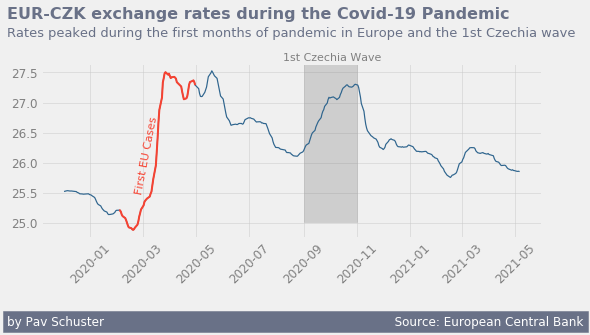

In [156]:
# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(eur_to_czk_covid["time"],
        eur_to_czk_covid["rolling_mean"],
        linewidth=1.2, color="#2F658E")
ax.grid(alpha=0.5)
ax.tick_params(axis="x", rotation=45, colors="gray", labelsize=12)
ax.tick_params(axis="y", colors="gray", labelsize=12 )

# Highlihting czechi 1st wave
ax.axvspan(xmin=737669, xmax=737730, ymin=0.09, alpha=0.3, color='grey')

# Highlighting the first months of the pandemic
ax.plot(eur_to_czk_covid_first_cases["time"],
        eur_to_czk_covid_first_cases["rolling_mean"],
        linewidth=2, color="#F74231")

# Adding explaining texts
ax.text(737475, 25.5, "First EU Cases", rotation=79, color="#F74231", size=11)
ax.text(737645, 27.7, "1st Czechia Wave", color="gray", size=11)

# Adding title & subtitle
ax.text(737330, 28.4, "EUR-CZK exchange rates during the Covid-19 Pandemic", weight="bold", color="#697187", size=16)
ax.text(737330, 28.1, "Rates peaked during the first months of pandemic in Europe and the 1st Czechia wave ", color="#697187", size=13)

# Adding source bar
ax.text(737330, 23.3, "by Pav Schuster" + " "*75 + "Source: European Central Bank",
         color="white", size=12, backgroundcolor = '#697187')

plt.show()